In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\Fraud_check.csv")

In [3]:
df 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# Convert taxable income to categorical variable
df['Taxable.Income'] = np.where(df['Taxable.Income']<=30000 , 'Risky','Good')
Tax_df = pd.get_dummies(df['Taxable.Income'],drop_first=True)

In [5]:
Tax_df

,Risky
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [6]:
# Drop unnecessary columns
df1 = df.drop(columns=['City.Population','Taxable.Income'],axis=1)

In [7]:
df1

,Undergrad,Marital.Status,Work.Experience,Urban
0,NO,Single,10,YES
1,YES,Divorced,18,YES
2,NO,Married,30,YES
3,YES,Single,15,YES
4,NO,Married,28,NO
...,...,...,...,...
595,YES,Divorced,7,YES
596,YES,Divorced,2,YES
597,NO,Divorced,0,YES
598,YES,Married,17,NO


In [8]:
# Convert categorical variables to dummy variables
df2 = pd.get_dummies(df1,columns=['Undergrad' , 'Marital.Status' , 'Urban'] ,drop_first = True)

In [9]:
df2

,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,10,0,0,1,1
1,18,1,0,0,1
2,30,0,1,0,1
3,15,1,0,1,1
4,28,0,1,0,0
...,...,...,...,...,...
595,7,1,0,0,1
596,2,1,0,0,1
597,0,0,0,0,1
598,17,1,1,0,0


## X = Df2 , Y = Tax_df

In [10]:
# Split the data into training and testing sets
x = df2
y = Tax_df

In [11]:
df2

,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,10,0,0,1,1
1,18,1,0,0,1
2,30,0,1,0,1
3,15,1,0,1,1
4,28,0,1,0,0
...,...,...,...,...,...
595,7,1,0,0,1
596,2,1,0,0,1
597,0,0,0,0,1
598,17,1,1,0,0


In [12]:
y

,Risky
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size= 0.3 , random_state=40)

## let's build and fit the decision tree model:
#### Building Decision Tree Classifier using Entropy Criteria

In [14]:
# Build the decision tree model
model = DecisionTreeClassifier(criterion='entropy' , max_depth = 3,class_weight = 'balanced')

# Fit the model on the training data
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

[Text(0.5416666666666666, 0.875, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 420\nvalue = [210, 210]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 22.5\nentropy = 0.99\nsamples = 206\nvalue = [107.5, 85.0]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 12.5\nentropy = 0.999\nsamples = 150\nvalue = [76.25, 70.0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.989\nsamples = 86\nvalue = [45, 35]'),
 Text(0.25, 0.125, 'entropy = 0.998\nsamples = 64\nvalue = [31.25, 35.0]'),
 Text(0.5, 0.375, 'x[0] <= 25.5\nentropy = 0.909\nsamples = 56\nvalue = [31.25, 15.0]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [9.375, 0.0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.975\nsamples = 41\nvalue = [21.875, 15.0]'),
 Text(0.75, 0.625, 'x[0] <= 0.5\nentropy = 0.993\nsamples = 214\nvalue = [102.5, 125.0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 6\nvalue = [3.75, 0.0]'),
 Text(0.8333333333333334, 0.375, 'x[3] <= 0.5\nentropy = 0.99\nsamples = 208\nvalue = 

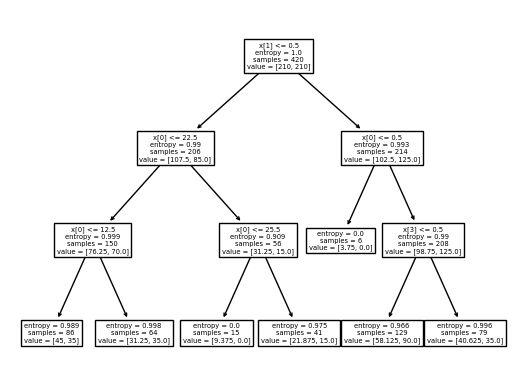

In [15]:
tree.plot_tree(model)

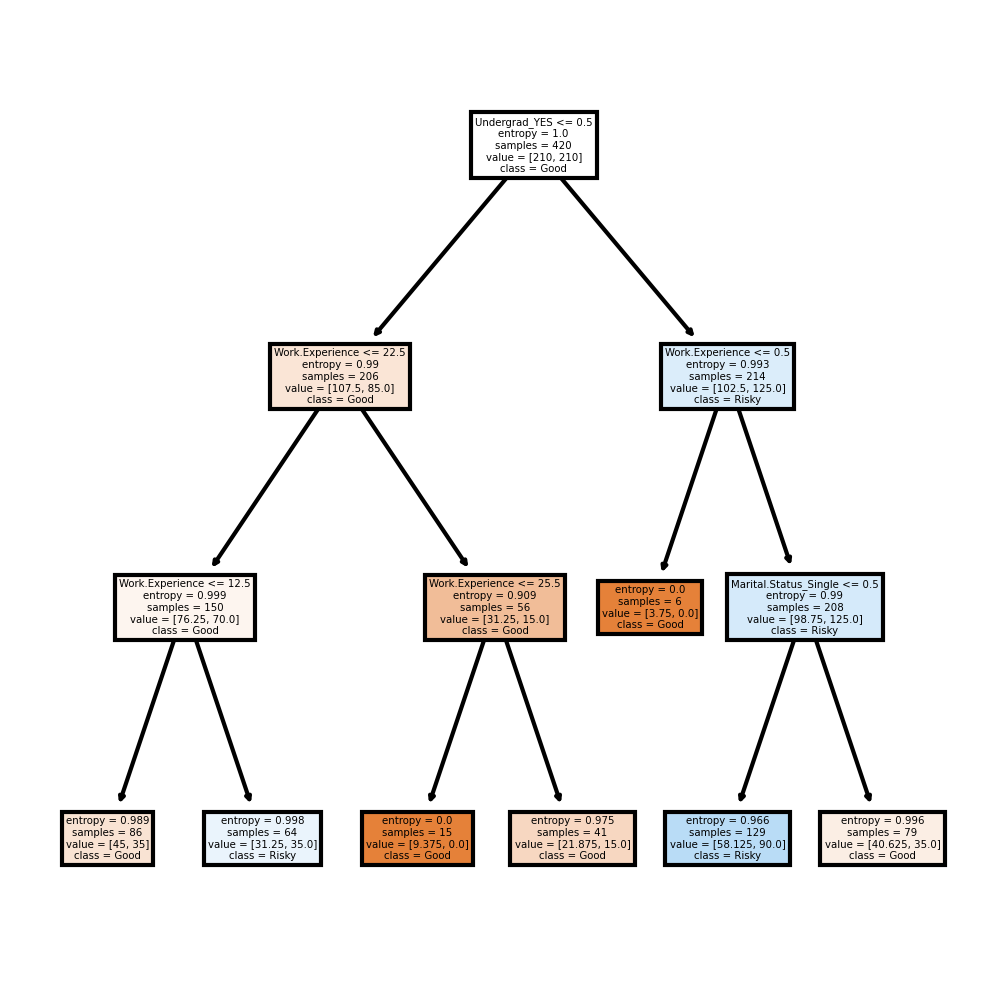

In [16]:
fn = ['Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['Good','Risky']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model,  feature_names= fn,class_names= cn, filled = True);

In [17]:
# Make predictions on the test set and evaluate the model
y_pred = model.predict(x_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1], dtype=uint8)

In [19]:
print(classification_report(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.52      0.62       140
           1       0.20      0.42      0.27        40

    accuracy                           0.50       180
   macro avg       0.48      0.47      0.45       180
weighted avg       0.64      0.50      0.54       180

Accuracy: 0.5
Confusion Matrix:
 [[73 67]
 [23 17]]


## Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
model_gini = DecisionTreeClassifier(criterion='gini' , max_depth= 3 )

In [21]:
model_gini.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
y_pred_gini = model_gini.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred_gini,zero_division=1))
print("Accuracy:", accuracy_score(y_test,y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       154
           1       1.00      0.00      0.00        44

    accuracy                           0.78       198
   macro avg       0.89      0.50      0.44       198
weighted avg       0.83      0.78      0.68       198

Accuracy: 0.7777777777777778
Confusion Matrix:
 [[154   0]
 [ 44   0]]


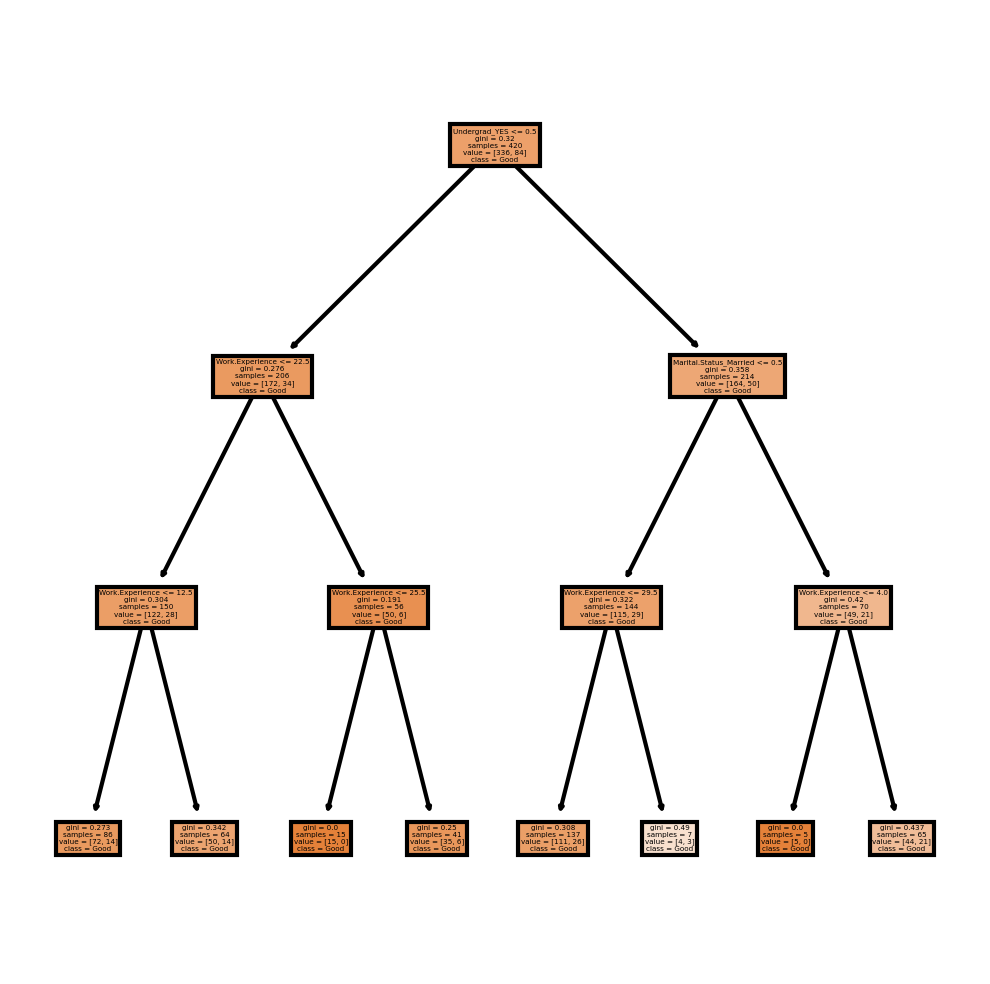

In [37]:
fn = ['Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['Good','Risky']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model_gini,  feature_names= fn,class_names= cn, filled = True);

## Decision Tree Regression Example

In [38]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [39]:
x_train,x_test ,y_train , y_test = train_test_split(x,y,test_size=0.33 , random_state=3)

In [40]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
y_pred = model.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.2774621212121212
Mean Absolute Error: 0.3244949494949495
R-squared Score: -0.6053165584415581
